In [20]:
# 需要哪些品种来展示
dict1 = {'白糖':'SR','豆粕':'M','玉米':'C','玉米淀粉':'CS','苹果':'AP','菜粕':'RM','纯碱':'SA','玻璃':'FG','甲醇':'MA','棉花':'CF','尿素':'UR'}

# 从数据库中取数据
import pymysql.cursors 
 
 
dbname = 'db_eastmoney'
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='0000',
                             db=dbname,
                             charset='utf8',
                             cursorclass=pymysql.cursors.DictCursor)
results =[]
try:
    with connection.cursor() as cursor:
        sql = '''SHOW TABLES'''
        cursor.execute(sql)
        result = cursor.fetchall() 
        for i in range(len(result)):
            results.append(result[i]['Tables_in_'+dbname])
finally:
    connection.close()
    
s = {value.lower() for key,value in dict1.items()}
# 将大写变小写，取出表名
tablename = []
for i in results:
    index = i.index('_')
    for a in s:
        if i[index+1:]==a:
            tablename.append(i)

import pandas as pd
import re
# 从数据库中取出数据
abitrage_dic = {}
conn = pymysql.connect(host = "localhost",port=3306,user='root',passwd='0000',db='db_eastmoney',charset="utf8")
for i in tablename:
    sql_query = 'SELECT * FROM '+i
    # 从mysql中读取表
    df1 = pd.read_sql(sql_query, con=conn)
    # 中文转码
    df1.name = df1.name.apply(lambda x:eval(repr(x).replace('\\\\', '\\')))
    # TA特殊处理
    if 'TA' in df1.loc[0,'name']:
        # 提取字母
        name = ''.join(re.findall(r'[A-Za-z]', df1.loc[0,'name']))  
    else:
        # 提取中文
        name = ''.join(re.findall(u"[\u4e00-\u9fa5]+", df1.loc[0,'name']))
        
    # 提取字母  code  AP 
    code = ''.join(re.findall(r'[A-Za-z]', df1.loc[0,'code']))
    # 去掉主力和次主力的行 带有- 的行
    df1 = df1[(df1.name.str.contains('主力')==False) & (df1.new_p!='-')]
    # 转换类型
    df1['new_p'] = df1['new_p'].astype('float64')
    df1['volume'] = df1['volume'].astype('int64')
    df1['money'] = df1['new_p']*df1['volume']
    
    if len(df1)>=2:
        date = df1.date.tolist()[0]
        abitrage_dic[name] = {'date':date,'合约':df1.code.tolist(),'主力':df1.loc[df1.dominant==1,'code'].values[0],'次主力':df1.loc[df1.dominant==2,'code'].values[0]}
conn.close()  #使用完后记得关掉
for key,value in abitrage_dic.items():
    print(key,value)

苹果 {'date': '2021-07-28', '合约': ['AP110', 'AP111', 'AP112', 'AP201', 'AP203', 'AP204', 'AP205'], '主力': 'AP110', '次主力': 'AP201'}
一号棉花 {'date': '2021-07-28', '合约': ['CF109', 'CF111', 'CF201', 'CF203', 'CF205'], '主力': 'CF109', '次主力': 'CF201'}
玻璃 {'date': '2021-07-28', '合约': ['FG108', 'FG109', 'FG110', 'FG111', 'FG112', 'FG201', 'FG202', 'FG203', 'FG204', 'FG205', 'FG206', 'FG207'], '主力': 'FG201', '次主力': 'FG109'}
甲醇 {'date': '2021-07-28', '合约': ['MA108', 'MA109', 'MA110', 'MA111', 'MA112', 'MA201', 'MA202', 'MA203', 'MA204', 'MA205'], '主力': 'MA109', '次主力': 'MA201'}
菜粕 {'date': '2021-07-28', '合约': ['RM108', 'RM109', 'RM111', 'RM201', 'RM203', 'RM205', 'RM207'], '主力': 'RM109', '次主力': 'RM201'}
纯碱 {'date': '2021-07-28', '合约': ['SA108', 'SA109', 'SA110', 'SA111', 'SA112', 'SA201', 'SA202', 'SA203', 'SA204', 'SA205', 'SA206', 'SA207'], '主力': 'SA109', '次主力': 'SA201'}
白糖 {'date': '2021-07-28', '合约': ['SR109', 'SR111', 'SR201', 'SR203', 'SR205', 'SR207'], '主力': 'SR109', '次主力': 'SR201'}
尿素 {'date': 

In [21]:
# 获取现货价格，放入字典
import pandas as pd
df = pd.read_csv(r'现货价格.csv',encoding='gb2312')
df

,date,苹果,豆粕,菜粕,白糖,玉米,玉米淀粉,甲醇,纯碱,玻璃,一号棉花,尿素
0,2021/7/12,6000,3590,3030,5643,2730,3200,NaN,NaN,NaN,NaN,NaN
1,2021/7/13,6000,3610,3060,5626,2730,3200,NaN,NaN,NaN,NaN,NaN
2,2021/7/15,6000,3680,3130,5610,2730,3150,2640.0,2250.0,3047.36,NaN,NaN
3,2021/7/16,6000,3670,3120,5520,2730,3150,2690.0,2250.0,3030.24,16978.0,2780.0
4,2021/7/19,6000,3770,3160,5550,2660,3100,2715.0,2250.0,3055.92,16984.0,2780.0
5,2021/7/20,6000,3690,3160,5550,2650,3100,2710.0,2250.0,3055.92,16988.0,2780.0
6,2021/7/21,6000,3690,3170,5555,2570,3000,2680.0,2220.0,3081.60,16976.0,2740.0
7,2021/7/22,6000,3640,3120,5565,2530,3000,2710.0,2200.0,3107.28,16967.0,2765.0
8,2021/7/23,6000,3600,3060,5570,2530,3000,2700.0,2200.0,3107.28,17012.0,2780.0
9,2021/7/26,6000,3600,3000,5575,2510,3000,2665.0,2200.0,3107.28,17211.0,2800.0


In [22]:
goods_dict = df.iloc[-1].to_dict()
for key,value in abitrage_dic.items():
    value['现货'] = goods_dict[key]
for key,value in abitrage_dic.items():
    print(key,value)

苹果 {'date': '2021-07-28', '合约': ['AP110', 'AP111', 'AP112', 'AP201', 'AP203', 'AP204', 'AP205'], '主力': 'AP110', '次主力': 'AP201', '现货': 6000}
一号棉花 {'date': '2021-07-28', '合约': ['CF109', 'CF111', 'CF201', 'CF203', 'CF205'], '主力': 'CF109', '次主力': 'CF201', '现货': 17440.0}
玻璃 {'date': '2021-07-28', '合约': ['FG108', 'FG109', 'FG110', 'FG111', 'FG112', 'FG201', 'FG202', 'FG203', 'FG204', 'FG205', 'FG206', 'FG207'], '主力': 'FG201', '次主力': 'FG109', '现货': 3107.28}
甲醇 {'date': '2021-07-28', '合约': ['MA108', 'MA109', 'MA110', 'MA111', 'MA112', 'MA201', 'MA202', 'MA203', 'MA204', 'MA205'], '主力': 'MA109', '次主力': 'MA201', '现货': 2635.0}
菜粕 {'date': '2021-07-28', '合约': ['RM108', 'RM109', 'RM111', 'RM201', 'RM203', 'RM205', 'RM207'], '主力': 'RM109', '次主力': 'RM201', '现货': 3050}
纯碱 {'date': '2021-07-28', '合约': ['SA108', 'SA109', 'SA110', 'SA111', 'SA112', 'SA201', 'SA202', 'SA203', 'SA204', 'SA205', 'SA206', 'SA207'], '主力': 'SA109', '次主力': 'SA201', '现货': 2200.0}
白糖 {'date': '2021-07-28', '合约': ['SR109', 'SR111'

In [23]:
import akshare as ak
from datetime import datetime
import re
# 取出各个合约的价格
# 取出合约的现货价格
# 画图
for key,value in abitrage_dic.items():
    name = key
    time = value['date']
    code_l = value['合约']
    num = ''.join(re.findall(r'\d*', code_l[0]))
    if len(num)==3:
        code_l = [''.join(re.findall(r'[A-Za-z]', i))+'2'+ ''.join(re.findall(r'\d*', i)) for i in code_l]
    c_p = {}
    c_p['现货'] = value['现货']
    for i in code_l:
        data = ak.futures_zh_minute_sina(symbol=i, period="60")
        data['date'] = data['date'].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
        data.close = data.close.astype('float64')
        data = data[data.date==datetime.strptime(time+' 15:00:00', "%Y-%m-%d %H:%M:%S")]
        if data.empty==True:
            continue
        close = data.iloc[-1].close
        c_p[i] = close
    value.pop('合约')
    value['合约价格'] = c_p
    print(name,c_p)


苹果 {'现货': 6000, 'AP2110': 5953.0, 'AP2111': 5770.0, 'AP2112': 5808.0, 'AP2201': 5938.0, 'AP2203': 5890.0, 'AP2205': 6166.0}
一号棉花 {'现货': 17440.0, 'CF2109': 17590.0, 'CF2111': 17695.0, 'CF2201': 17795.0, 'CF2205': 17825.0}
玻璃 {'现货': 3107.28, 'FG2108': 2979.0, 'FG2109': 2967.0, 'FG2110': 2940.0, 'FG2111': 2895.0, 'FG2112': 2887.0, 'FG2201': 2848.0, 'FG2202': 2796.0, 'FG2203': 2741.0, 'FG2204': 2734.0, 'FG2205': 2687.0, 'FG2206': 2655.0, 'FG2207': 2637.0}
甲醇 {'现货': 2635.0, 'MA2108': 2592.0, 'MA2109': 2651.0, 'MA2110': 2680.0, 'MA2111': 2696.0, 'MA2112': 2723.0, 'MA2201': 2737.0, 'MA2202': 2740.0, 'MA2203': 2721.0, 'MA2205': 2670.0}
菜粕 {'现货': 3050, 'RM2109': 2919.0, 'RM2111': 2800.0, 'RM2201': 2810.0, 'RM2203': 2782.0, 'RM2205': 2813.0}
纯碱 {'现货': 2200.0, 'SA2108': 2298.0, 'SA2109': 2312.0, 'SA2110': 2410.0, 'SA2111': 2421.0, 'SA2112': 2571.0, 'SA2201': 2584.0, 'SA2202': 2640.0, 'SA2203': 2637.0, 'SA2204': 2686.0, 'SA2205': 2689.0, 'SA2206': 2724.0, 'SA2207': 2712.0}
白糖 {'现货': 5590, 'SR2109'

In [24]:
abitrage_dic
key_list = abitrage_dic.keys()
num_list = list(abitrage_dic.values())
num_list = [len(i['合约价格']) for i in num_list]
t = max(num_list)
sort_ab = dict(zip(key_list,num_list))
sort_ab = dict(sorted(sort_ab.items(),key=lambda x:x[1]))
sort_ab,t

({'一号棉花': 5,
  '白糖': 5,
  '菜粕': 6,
  '玉米淀粉': 6,
  '苹果': 7,
  '玉米': 7,
  '豆粕': 9,
  '甲醇': 10,
  '尿素': 11,
  '玻璃': 13,
  '纯碱': 13},
 13)

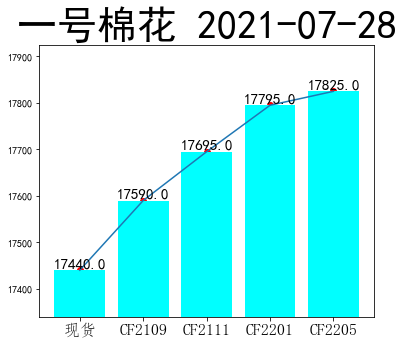

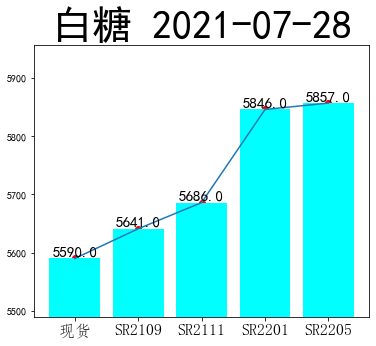

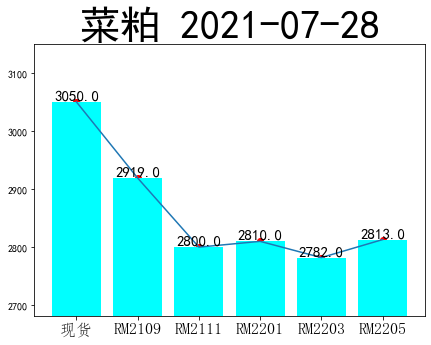

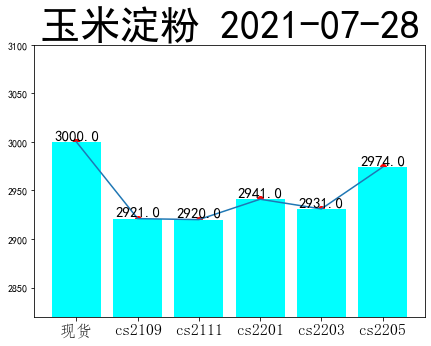

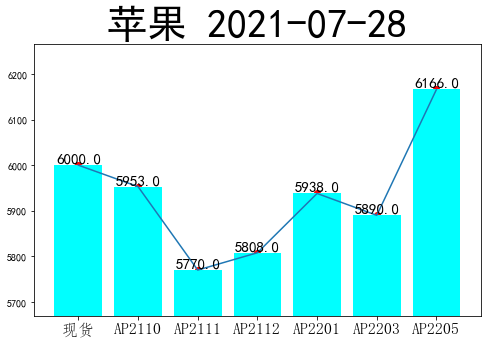

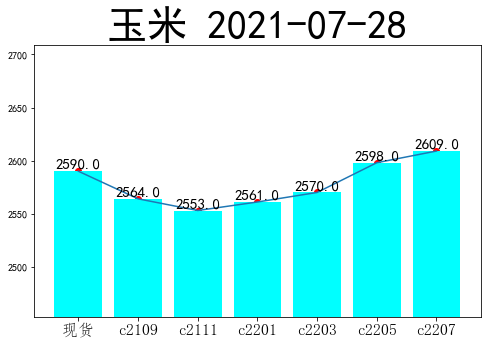

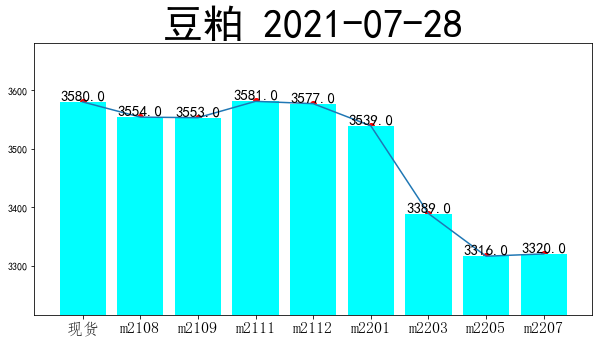

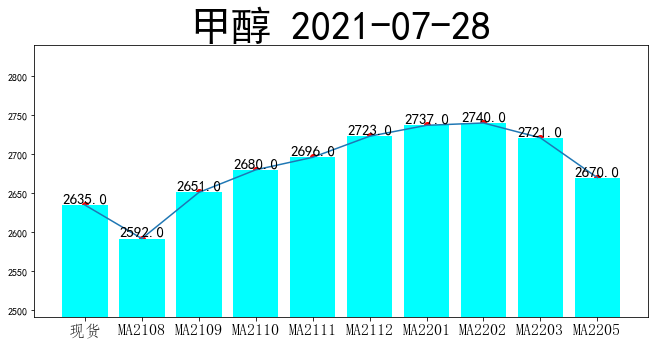

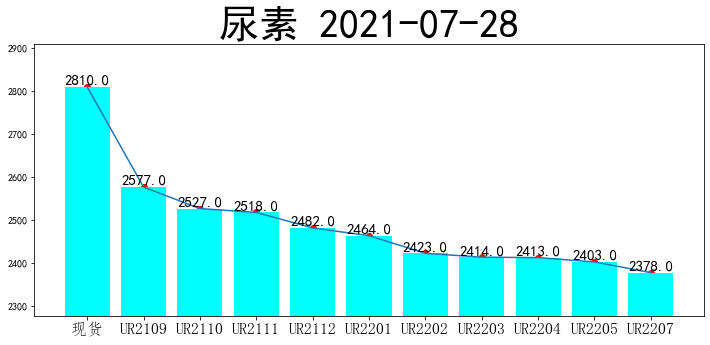

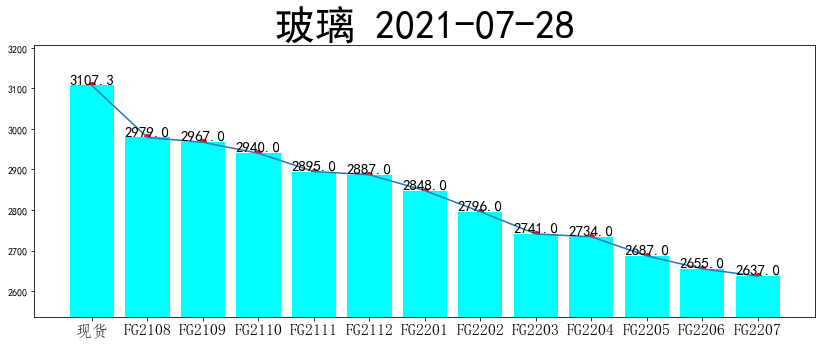

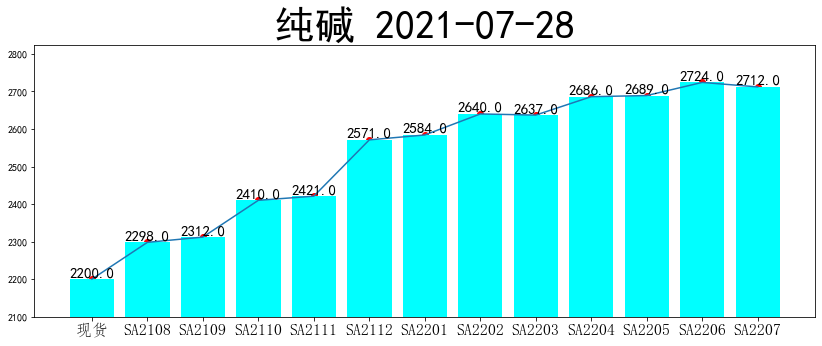

In [25]:
#plt画图
import matplotlib.pyplot as plt
import os
plt.rcParams['font.sans-serif']=['Simhei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
e = 0
path = r'C:\Users\17218\Desktop\image'
for key,value in sort_ab.items():
    date = abitrage_dic[key]['date']
    ft_name = key
    names = list(abitrage_dic[key]['合约价格'].keys())
    values = list(abitrage_dic[key]['合约价格'].values())
    n = value
    fig=plt.figure(figsize=(n+1,5))
    plt.ylim((min(values)-100,max(values)+100))
    plt.bar(names, values,color='cyan')
    plt.scatter(names, values,color='red')
    plt.plot(names, values)
    for a,b in abitrage_dic[key]['合约价格'].items():
      plt.text(a, b+0.5, '%.1f' % b, ha='center',weight = "light",va= 'bottom',fontsize=15)
    plt.title(ft_name+' '+date,fontsize=40)
    plt.xticks(fontproperties='Fangsong',fontsize = 16,weight='bold')
    # plt.xlabel("期现",fontproperties = 'Simhei',fontsize = 18)#设置x坐标标注，字体为18号
    # plt.ylabel("价格",fontproperties = 'Simhei',fontsize = 18)
    plt.savefig(os.path.join(path,ft_name,date+".png"))
#     plt.show()

In [26]:
key_list,sort_ab.keys()


(dict_keys(['苹果', '一号棉花', '玻璃', '甲醇', '菜粕', '纯碱', '白糖', '尿素', '玉米', '玉米淀粉', '豆粕']),
 dict_keys(['一号棉花', '白糖', '菜粕', '玉米淀粉', '苹果', '玉米', '豆粕', '甲醇', '尿素', '玻璃', '纯碱']))

In [27]:
import os

import PIL.Image as Image

IMAGES_PATH = r'C:\Users\17218\Desktop\image'  # 图片集地址
IMAGES_FORMAT = ['.PNG']  # 图片格式

IMAGE_SAVE_PATH = r'final.PNG'  # 图片转换后的地址

In [32]:

date = '2021-07-28'
imagelist = [os.path.join(IMAGES_PATH,x,date+'.png') for x in sort_ab.keys()]
imagelist

['C:\\Users\\17218\\Desktop\\image\\一号棉花\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\白糖\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\菜粕\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\玉米淀粉\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\苹果\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\玉米\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\豆粕\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\甲醇\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\尿素\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\玻璃\\2021-07-28.png',
 'C:\\Users\\17218\\Desktop\\image\\纯碱\\2021-07-28.png']

In [33]:
# print img.size  #图片的尺寸
# print img.mode  #图片的模式
# print img.format  #图片的格式
images_size = []
import matplotlib.pyplot as plt
for i in imagelist:
    img=Image.open(i)
    img1 = img.load()
    images_size.append(img.size[0])
images_size

[432, 432, 504, 504, 576, 576, 720, 792, 864, 1008, 1008]

In [34]:
s = [images_size[0]+images_size[2]+images_size[1],images_size[4]+images_size[5]+images_size[3],images_size[7]+images_size[8]+images_size[6],images_size[9]+images_size[10]]

(2376, 1600)


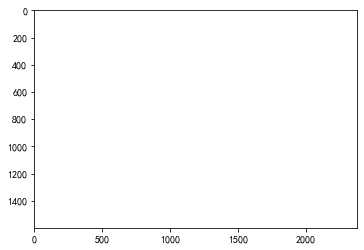

(2376, 1600)


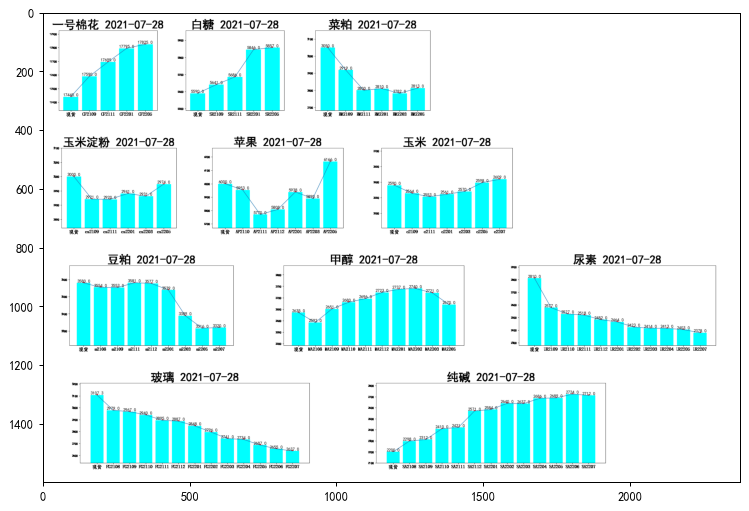

In [35]:
IMAGE_COLUMN = 3
IMAGE_ROW = 4
IMAGE_c_SIZE = max(s)
IMAGE_r_SIZE = 400
# 定义图像拼接函数
def image_compose():
    to_image = Image.new('RGB', (IMAGE_c_SIZE, IMAGE_ROW * IMAGE_r_SIZE),'white')  # 创建一个新图
    print(to_image.size)
    plt.imshow(to_image)
    plt.show()
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    e = 0
    for y in range(1, IMAGE_ROW + 1):
        x_pos = 0
        for x in range(1, IMAGE_COLUMN + 1):
            if e<len(imagelist):
                from_image = Image.open(imagelist[e]).resize((images_size[e], 360), Image.ANTIALIAS)             
#                 plt.imshow(from_image)
#                 plt.show()
#             to_image.paste(from_image, (images_size[y-1], (y - 1) * IMAGE_r_SIZE))
                to_image.paste(from_image, (x_pos, 20+(y - 1) * IMAGE_r_SIZE))
                x_pos = x_pos+images_size[e]
                e = e+1
    plt.figure(figsize=(10,40),dpi=90)  #高度相同，宽度不同
    print(to_image.size)
    plt.imshow(to_image)
    plt.show()
    return to_image.save(IMAGE_SAVE_PATH)  # 保存新图

image_compose()  # 调用函数


In [36]:
# 获取图片集地址下的所有图片名称
image_names = [name for name in os.listdir(IMAGES_PATH) for item in IMAGES_FORMAT if
               os.path.splitext(name)[1] == item]

print("image_names", image_names)

image_names []


In [ ]:
# 简单的对于参数的设定和实际图片集的大小进行数量判断
if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    raise ValueError("合成图片的参数和要求的数量不能匹配！")


# 定义图像拼接函数
def image_compose():
    to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))  # 创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(IMAGES_PATH + image_names[IMAGE_COLUMN * (y - 1) + x - 1]).resize(
                (IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE, (y - 1) * IMAGE_SIZE))
    return to_image.save(IMAGE_SAVE_PATH)  # 保存新图


image_compose()  # 调用函数


In [178]:
images_size,len(images_size)


([504, 504, 576, 576, 648, 648, 720, 720, 864, 1008, 1008], 11)

In [179]:

max1 = max(images_size)
min1 = min(images_size)
mid1 = (max1+min1)/2
max1,min1,mid1

(1008, 504, 756.0)

In [187]:
s = [images_size[0]+images_size[2]+images_size[1],images_size[4]+images_size[5]+images_size[3],images_size[7]+images_size[8]+images_size[6],images_size[9]+images_size[10]]

2160

2304

1872

2016